## 1. Example

#### Load Data

(540, 960, 3)
<class 'numpy.ndarray'>


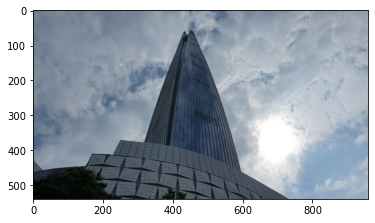

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

filePath = "C:/Users/GRlab/Desktop/롯데월드타워_024.jpg"

stream = open( filePath.encode("utf-8") , "rb")
bytes = bytearray(stream.read())
numpyArray = np.asarray(bytes, dtype=np.uint8)

landmark_1 = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

landmark_1 = cv2.cvtColor(landmark_1, cv2.COLOR_BGR2RGB)
landmark_1 = landmark_1.astype(np.float32) / 255.

print(landmark_1.shape)
print(type(landmark_1))

plt.imshow(landmark_1)
plt.show()

#### Convolutaion

conv2d.shape (1, 540, 960, 6)


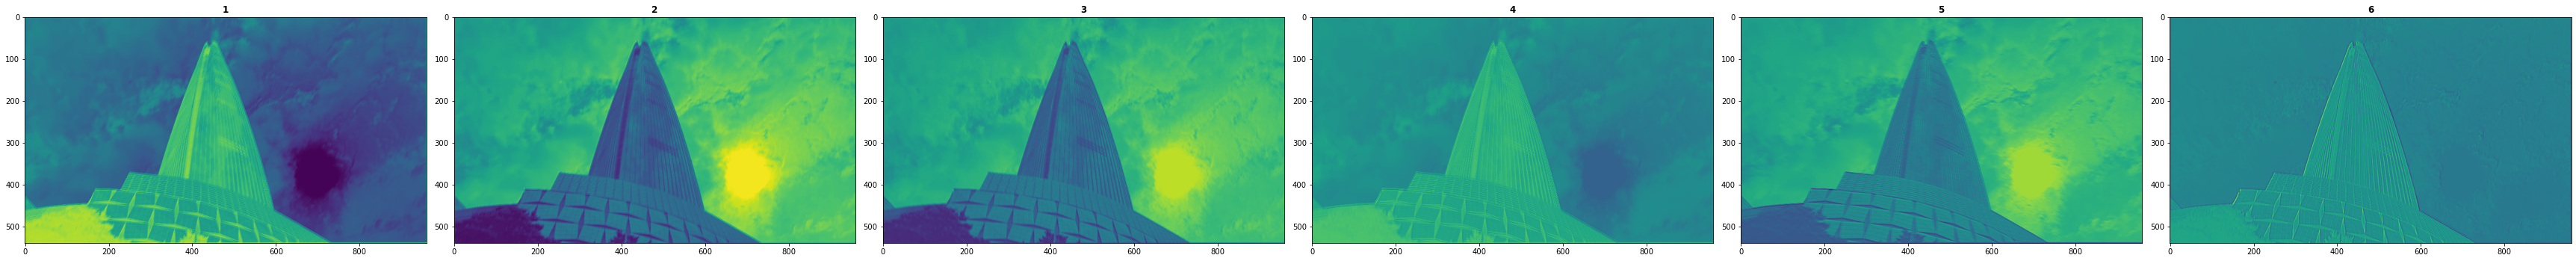

In [2]:
landmark_1 = landmark_1.reshape(1,540,960,3)
landmark_1 = tf.convert_to_tensor(landmark_1)

weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=6, kernel_size=5, padding='SAME',
                             kernel_initializer=weight_init)(landmark_1)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)

## Plot 1
fig, axes = plt.subplots(1, len(feature_maps), 
                         figsize=(48, 54),
                         tight_layout=True)

for i, feature_map in enumerate(feature_maps):
    axes[i].imshow(feature_map.reshape(540,960))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, feature_map in enumerate(feature_maps):
#    #print(feature_map.reshape(540,960))
#    plt.subplot(1,len(feature_maps),i+1), plt.imshow(feature_map.reshape(540,960))
#plt.show()

#### Pooling

############## MaxPooling ##############
conv2d.shape (1, 540, 960, 6)
pool1.shape (1, 270, 480, 6)


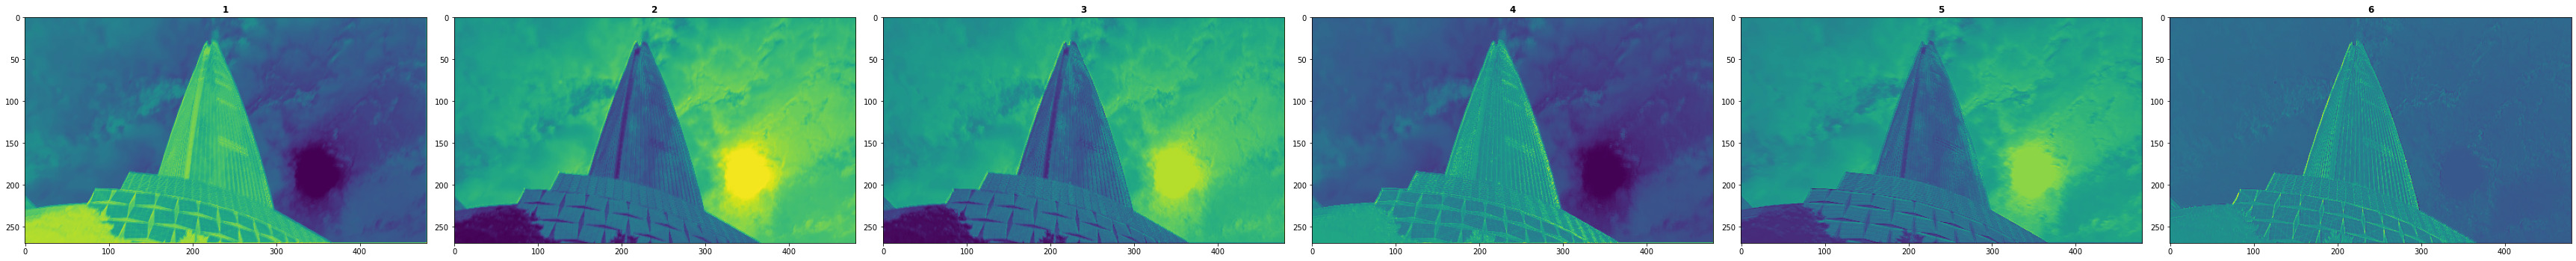

############## AveragePooling ##############
conv2d.shape (1, 540, 960, 6)
pool2.shape (1, 270, 480, 6)


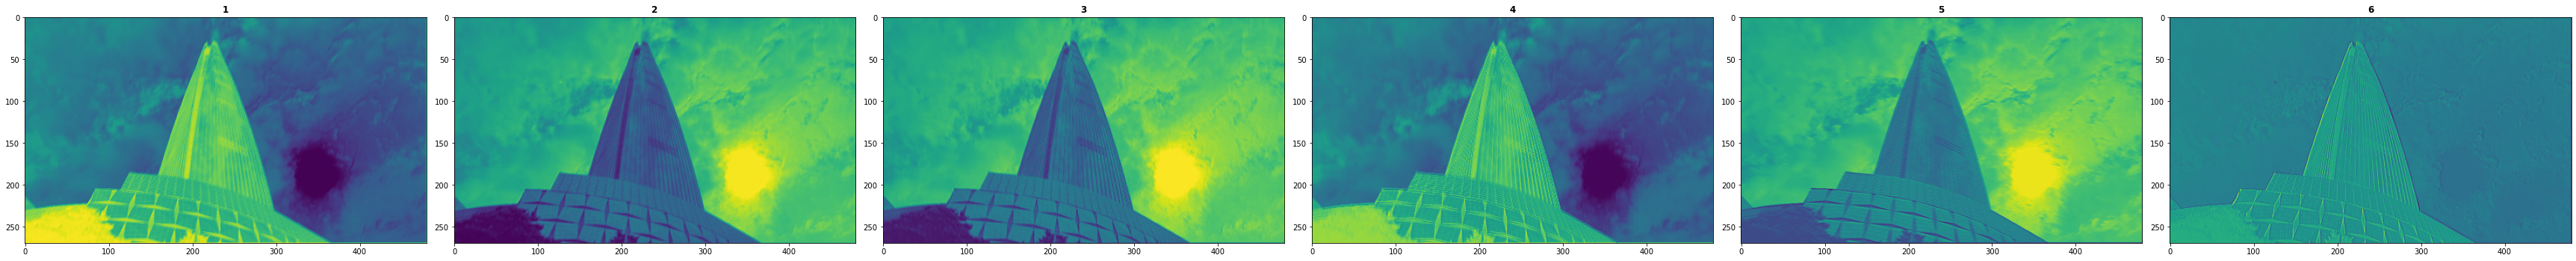

############## Max : Average = 3 : 2 ##############


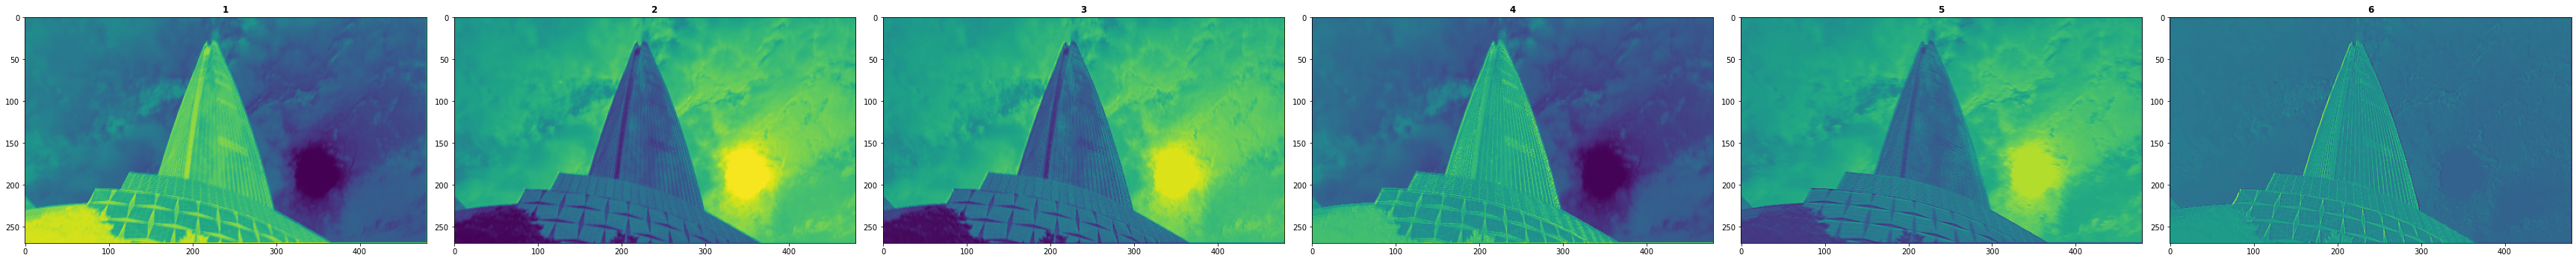

In [3]:
# 1. MaxPolling
print("############## MaxPooling ##############")

print("conv2d.shape", conv2d.shape)

pool1 = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool1.shape", pool1.shape)
pool_imgs1 = np.swapaxes(pool1, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs1):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## Plot 2
#for i, pool_img in enumerate(pool_imgs1):
#    #print(pool_img.reshape(540,960))
#    plt.subplot(1,len(pool_imgs1),i+1), plt.imshow(pool_img.reshape(270,480))
#plt.show()


# 2. AveragePolling
print("############## AveragePooling ##############")

print("conv2d.shape", conv2d.shape)

pool2 = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print("pool2.shape", pool2.shape)
pool_imgs2 = np.swapaxes(pool2, 0, 3)


## Plot 1
fig, axes = plt.subplots(1, len(pool_imgs2), 
                         figsize=(48, 54),
                         tight_layout=True)


for i, pool_img in enumerate(pool_imgs2):
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()


# 3. Max : Average = 3 : 2
print("############## Max : Average = 3 : 2 ##############")

fig, axes = plt.subplots(1, len(pool_imgs1), 
                         figsize=(48, 54),
                         tight_layout=True)

for i in range(len(pool_imgs1)):
    pool_img = (pool_imgs1[i]*3 + pool_imgs2[i]*2)/5
    #print(pool_img.reshape(270,480))
    axes[i].imshow(pool_img.reshape(270,480))
    axes[i].set_title(str(i+1), fontweight='bold')
plt.show()

## 2. Application

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
from glob import glob

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


#### Hyper parameters

In [5]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

#### Checkpoint Directory

In [6]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'seq_model'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

#### MNIST/Fashion MNIST Data

In [7]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

#### DataSet

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
print(type(train_images))
print(train_images.shape)
print(type(train_labels))
print(train_labels.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

#### Model

In [11]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

In [12]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

#### Loss Function

In [13]:
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))    
    return loss

####  Calculating Gradient

In [14]:
@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

#### Caculating Model's Accuracy

In [15]:
@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

#### Optimizer

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

#### Creating Chekcpoint

In [17]:
checkpoint = tf.train.Checkpoint(cnn=model)

#### Training

In [18]:
@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [19]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        train(model, images, labels)
        #grads = grad(model, images, labels)                
        #optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.16568016 train accuracy =  0.9579 test accuracy =  0.9853
Epoch: 2 loss = 0.04006977 train accuracy =  0.9905 test accuracy =  0.9910
Epoch: 3 loss = 0.02552252 train accuracy =  0.9935 test accuracy =  0.9923
Epoch: 4 loss = 0.01870443 train accuracy =  0.9954 test accuracy =  0.9920
Epoch: 5 loss = 0.01485836 train accuracy =  0.9964 test accuracy =  0.9918
Epoch: 6 loss = 0.01155042 train accuracy =  0.9972 test accuracy =  0.9928
Epoch: 7 loss = 0.00936852 train accuracy =  0.9977 test accuracy =  0.9940
Epoch: 8 loss = 0.00718458 train accuracy =  0.9986 test accuracy =  0.9916
Epoch: 9 loss = 0.00639185 train accuracy =  0.9987 test accuracy =  0.9924
Epoch: 10 loss = 0.00505709 train accuracy =  0.9989 test accuracy =  0.9927
Epoch: 11 loss = 0.00415704 train accuracy =  0.9990 test accuracy =  0.9943
Epoch: 12 loss = 0.00334500 train accuracy =  0.9991 test accuracy =  0.9934
Epoch: 13 loss = 0.00278237 train accuracy =  0.

## Activation Comparision

#### Activation = Leaky Relu

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
from glob import glob

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


In [21]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [22]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints_leaky'
model_dir_name = 'seq_model_leaky'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [23]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [26]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.leaky_relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.leaky_relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.leaky_relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

In [27]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [28]:
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))    
    return loss

@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

checkpoint = tf.train.Checkpoint(cnn=model)

@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [29]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        train(model, images, labels)
        #grads = grad(model, images, labels)                
        #optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.15911877 train accuracy =  0.9595 test accuracy =  0.9852
Epoch: 2 loss = 0.03737561 train accuracy =  0.9905 test accuracy =  0.9918
Epoch: 3 loss = 0.02247805 train accuracy =  0.9942 test accuracy =  0.9917
Epoch: 4 loss = 0.01755852 train accuracy =  0.9958 test accuracy =  0.9918
Epoch: 5 loss = 0.01412425 train accuracy =  0.9965 test accuracy =  0.9913
Epoch: 6 loss = 0.01008478 train accuracy =  0.9976 test accuracy =  0.9924
Epoch: 7 loss = 0.00784327 train accuracy =  0.9983 test accuracy =  0.9931
Epoch: 8 loss = 0.00621424 train accuracy =  0.9986 test accuracy =  0.9927
Epoch: 9 loss = 0.00553838 train accuracy =  0.9988 test accuracy =  0.9898
Epoch: 10 loss = 0.00499310 train accuracy =  0.9987 test accuracy =  0.9934
Epoch: 11 loss = 0.00414492 train accuracy =  0.9990 test accuracy =  0.9947
Epoch: 12 loss = 0.00302400 train accuracy =  0.9995 test accuracy =  0.9924
Epoch: 13 loss = 0.00314732 train accuracy =  0.

## Pooling Comparision

#### Pooling = AveragePooling

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
from glob import glob

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


In [31]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [32]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints_avg'
model_dir_name = 'seq_model_avg'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [33]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [34]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.AveragePooling2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.AveragePooling2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.AveragePooling2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [35]:
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))    
    return loss

@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

checkpoint = tf.train.Checkpoint(cnn=model)

@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [36]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        train(model, images, labels)
        #grads = grad(model, images, labels)                
        #optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.24118869 train accuracy =  0.9365 test accuracy =  0.9807
Epoch: 2 loss = 0.06764305 train accuracy =  0.9833 test accuracy =  0.9867
Epoch: 3 loss = 0.04725511 train accuracy =  0.9883 test accuracy =  0.9890
Epoch: 4 loss = 0.03515317 train accuracy =  0.9915 test accuracy =  0.9904
Epoch: 5 loss = 0.02819269 train accuracy =  0.9928 test accuracy =  0.9913
Epoch: 6 loss = 0.02303675 train accuracy =  0.9946 test accuracy =  0.9913
Epoch: 7 loss = 0.02008950 train accuracy =  0.9951 test accuracy =  0.9924
Epoch: 8 loss = 0.01652459 train accuracy =  0.9961 test accuracy =  0.9924
Epoch: 9 loss = 0.01353343 train accuracy =  0.9968 test accuracy =  0.9916
Epoch: 10 loss = 0.01136675 train accuracy =  0.9970 test accuracy =  0.9931
Epoch: 11 loss = 0.01064232 train accuracy =  0.9975 test accuracy =  0.9923
Epoch: 12 loss = 0.00948454 train accuracy =  0.9979 test accuracy =  0.9934
Epoch: 13 loss = 0.00776785 train accuracy =  0.

## Dropout Comparision

#### Drouput = SpatialDropout2D

In [38]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [39]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints_spDrop'
model_dir_name = 'seq_model_spDrop'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [40]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [43]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPooling2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPooling2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.GaussianDropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)             

In [44]:
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))    
    return loss

@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

checkpoint = tf.train.Checkpoint(cnn=model)

@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [45]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        train(model, images, labels)
        #grads = grad(model, images, labels)                
        #optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.18412822 train accuracy =  0.9550 test accuracy =  0.9851
Epoch: 2 loss = 0.04899493 train accuracy =  0.9891 test accuracy =  0.9903
Epoch: 3 loss = 0.03370469 train accuracy =  0.9931 test accuracy =  0.9913
Epoch: 4 loss = 0.02536351 train accuracy =  0.9948 test accuracy =  0.9911
Epoch: 5 loss = 0.01876315 train accuracy =  0.9964 test accuracy =  0.9915
Epoch: 6 loss = 0.01698379 train accuracy =  0.9971 test accuracy =  0.9905
Epoch: 7 loss = 0.01304755 train accuracy =  0.9978 test accuracy =  0.9928
Epoch: 8 loss = 0.01069544 train accuracy =  0.9983 test accuracy =  0.9911
Epoch: 9 loss = 0.00997485 train accuracy =  0.9988 test accuracy =  0.9929
Epoch: 10 loss = 0.00826123 train accuracy =  0.9987 test accuracy =  0.9932
Epoch: 11 loss = 0.00804949 train accuracy =  0.9988 test accuracy =  0.9930
Epoch: 12 loss = 0.00655243 train accuracy =  0.9992 test accuracy =  0.9933
Epoch: 13 loss = 0.00630120 train accuracy =  0.